<h1>Gradient Boosting</h1>

<h2>Load the Preprocessed Dataset</h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  # Changed to GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../Dataset/after_preprocessing.csv")
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0.439024,1,0.24,2,0.455873,0,0,0,0.25,1,...,0.166667,1,0,0.158730,0,0,0,3,2,1
1,0.414634,1,0.12,0,0.223615,2,0,0,0.25,1,...,0.666667,0,1,0.198413,0,0,0,2,0,0
2,0.780488,1,0.12,0,0.291965,1,0,0,0.75,1,...,0.333333,2,1,0.587302,0,0,1,2,1,1
3,0.975610,1,0.86,3,0.288079,1,3,2,0.00,1,...,0.666667,0,1,0.746032,0,0,0,3,1,0
4,0.512195,1,0.46,0,0.226362,2,0,0,0.00,1,...,1.000000,1,0,0.341270,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73910,0.780488,0,0.22,0,0.213630,1,0,0,0.25,1,...,0.333333,2,2,0.261905,0,0,1,3,3,0
73911,0.000000,1,0.06,2,0.456611,1,0,2,0.75,0,...,0.000000,2,1,0.563492,0,0,0,1,2,0
73912,0.097561,0,0.26,4,0.450178,1,0,2,0.00,1,...,0.333333,0,2,0.214286,0,1,0,2,2,1
73913,0.121951,1,0.14,0,0.114253,1,3,0,0.00,0,...,0.000000,0,0,0.055556,0,0,0,2,1,0


<h2>Split the Dataset into Training and Testing Sets</h2>

In [3]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59132, 22), (59132,), (14783, 22), (14783,))

<h2>Train Gradient Boosting</h2>

In [4]:
gb_classifier = GradientBoostingClassifier(random_state=42)

In [5]:
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
y_pred.shape

(14783,)

<h2>Confusion Matrix and Classification Report</h2>

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 75.57%
Confusion Matrix:
[[5132 1839]
 [1773 6039]]


In [7]:
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Negative:", TN)
print("Flase Postive:", FP)
print("Flase Negative:", FN)
print("True Postive:", TP)

True Negative: 5132
Flase Postive: 1839
Flase Negative: 1773
True Postive: 6039


In [8]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      6971
           1       0.77      0.77      0.77      7812

    accuracy                           0.76     14783
   macro avg       0.75      0.75      0.75     14783
weighted avg       0.76      0.76      0.76     14783



<h2>Feature Selection with Chi-Square and Mutual Information</h2>

Best k for Chi-Square Feature Selection: 19
Best k for Mutual Information Feature Selection: 16


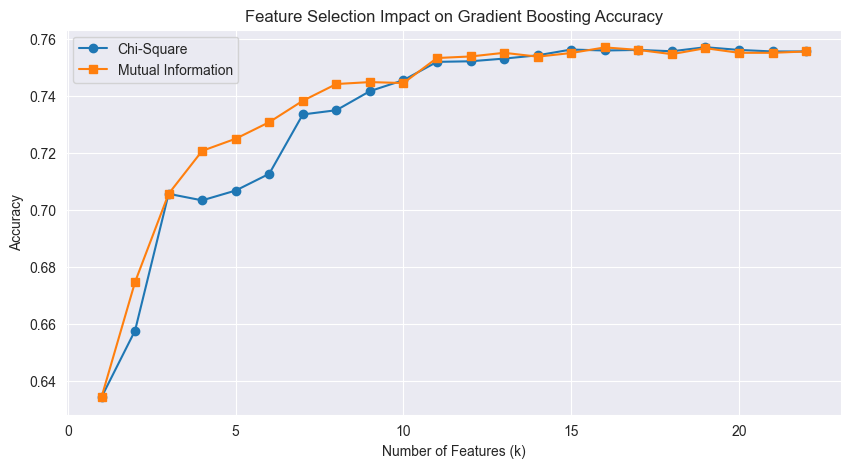

In [9]:
k_values = list(range(1, X_train.shape[1] + 1))
accuracy_chi2 = []
accuracy_mi = []

for k in k_values:

    selector_chi2 = SelectKBest(score_func=chi2, k=k)
    X_train_selected_chi2 = selector_chi2.fit_transform(X_train, y_train)
    X_test_selected_chi2 = selector_chi2.transform(X_test)

    gb_classifier.fit(X_train_selected_chi2, y_train)
    y_pred_chi2 = gb_classifier.predict(X_test_selected_chi2)
    accuracy_chi2.append(accuracy_score(y_test, y_pred_chi2))

    selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_selected_mi = selector_mi.fit_transform(X_train, y_train)
    X_test_selected_mi = selector_mi.transform(X_test)

    gb_classifier.fit(X_train_selected_mi, y_train)
    y_pred_mi = gb_classifier.predict(X_test_selected_mi)
    accuracy_mi.append(accuracy_score(y_test, y_pred_mi))

best_k_chi2 = k_values[np.argmax(accuracy_chi2)]
best_k_mi = k_values[np.argmax(accuracy_mi)]
print("Best k for Chi-Square Feature Selection:", best_k_chi2)
print("Best k for Mutual Information Feature Selection:", best_k_mi)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_chi2, marker='o', label="Chi-Square")
plt.plot(k_values, accuracy_mi, marker='s', label="Mutual Information")
plt.xlabel("Number of Features (k)")
plt.ylabel("Accuracy")
plt.title("Feature Selection Impact on Gradient Boosting Accuracy")
plt.legend()
plt.show()

<h2>Train Random Forest with the best k for Chi-Square</h2>

In [10]:
k = best_k_chi2
selector_chi2 = SelectKBest(score_func=chi2, k=k)
X_train_selected_chi2 = selector_chi2.fit_transform(X_train, y_train)
X_test_selected_chi2 = selector_chi2.transform(X_test)

gb_classifier.fit(X_train_selected_chi2, y_train)
y_pred_chi2 = gb_classifier.predict(X_test_selected_chi2)

accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)
print("Gradient Boosting Accuracy after Chi-Square feature selection:", accuracy_chi2)

Gradient Boosting Accuracy after Chi-Square feature selection: 0.7571534871135764


<h2>Confusion Matrix and Classification Report for Chi-Square</h2>

In [11]:
conf_matrix_chi2 = confusion_matrix(y_test, y_pred_chi2)
print("Confusion Matrix after Chi-Square feature selection:")
print(conf_matrix_chi2)

class_report_chi2 = classification_report(y_test, y_pred_chi2)
print("Classification Report after Chi-Square feature selection:")
print(class_report_chi2)

Confusion Matrix after Chi-Square feature selection:
[[5139 1832]
 [1758 6054]]
Classification Report after Chi-Square feature selection:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      6971
           1       0.77      0.77      0.77      7812

    accuracy                           0.76     14783
   macro avg       0.76      0.76      0.76     14783
weighted avg       0.76      0.76      0.76     14783



<h2>Selected Features for Chi-Square</h2>

In [12]:
selected_features_chi2 = selector_chi2.get_support(indices=True)
selected_feature_names_chi2 = X_train.columns[selected_features_chi2]
print("Selected Features (Chi-Square):", list(selected_feature_names_chi2))

Selected Features (Chi-Square): ['Age', 'Gender', 'Years at Company', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation']


<h2>Train Random Forest with the best k for Mutual Information</h2>

In [13]:
k = best_k_mi
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected_mi = selector_mi.fit_transform(X_train, y_train)
X_test_selected_mi = selector_mi.transform(X_test)

gb_classifier.fit(X_train_selected_mi, y_train)
y_pred_mi = gb_classifier.predict(X_test_selected_mi)

accuracy_mi = accuracy_score(y_test, y_pred_mi)
print("Gradient Boosting Accuracy after Mutual Information feature selection:", accuracy_mi)

Gradient Boosting Accuracy after Mutual Information feature selection: 0.7566123249678685


<h2>Confusion Matrix and Classification Report for Mutual Information</h2>

In [14]:
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)
print("Confusion Matrix after Mutual Information feature selection:")
print(conf_matrix_mi)

class_report_mi = classification_report(y_test, y_pred_mi)
print("Classification Report after Mutual Information feature selection:")
print(class_report_mi)

Confusion Matrix after Mutual Information feature selection:
[[5151 1820]
 [1778 6034]]
Classification Report after Mutual Information feature selection:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      6971
           1       0.77      0.77      0.77      7812

    accuracy                           0.76     14783
   macro avg       0.76      0.76      0.76     14783
weighted avg       0.76      0.76      0.76     14783



<h2>Selected Features for Mutual Information</h2>

In [15]:
selected_features_mi = selector_mi.get_support(indices=True)
selected_feature_names_mi = X_train.columns[selected_features_mi]
print("Selected Features (Mutual Information):", list(selected_feature_names_mi))

Selected Features (Mutual Information): ['Age', 'Gender', 'Years at Company', 'Work-Life Balance', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Tenure', 'Remote Work', 'Innovation Opportunities', 'Company Reputation']


<h2>Feature Importance in Gradient Boosting</h2>

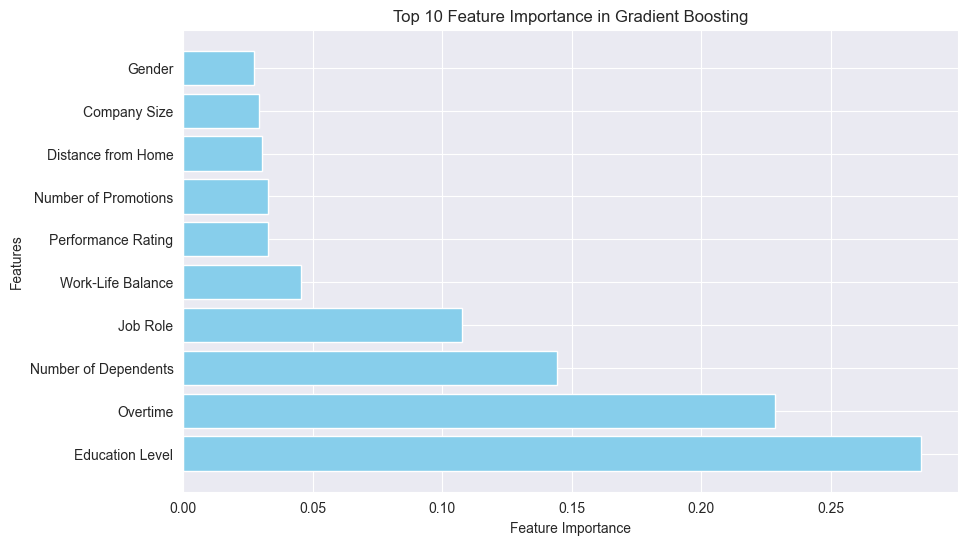

In [16]:
importances = gb_classifier.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')  # Top 10 features
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

<h2>Confusion Matrix Heatmap</h2>

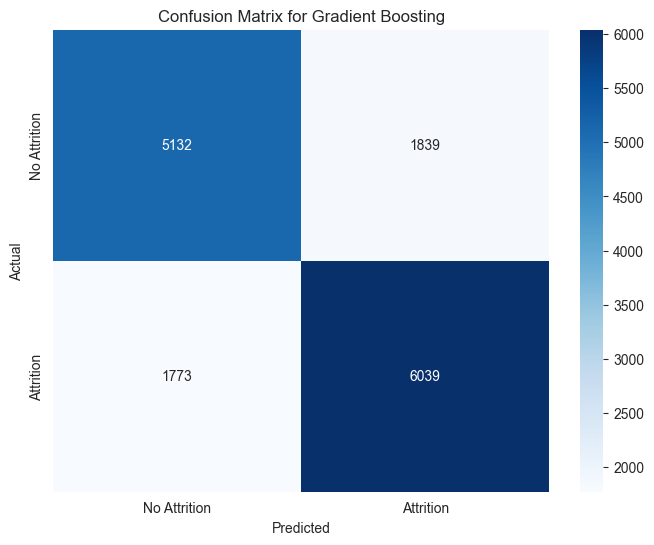

In [17]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()